# **NVIDIA Stock Price Analysis**
## **Objective:**
- The primary objective of this project is to further my understanding of NVIDIA as a company and a stock market investment. This can be done using the following:
- Use Deep Learning & Neural Networks (application of research).
- Perform an EDA on NVIDIA's stock price, and relate this to the real world. This could involve:
    - Trend Analysis
    - Volatility Analysis
    - Earnings Reports
    - Balance Sheet Health
    - Sector Trends
    - Competitive Position
    - Sentiment of Other Investors
- Perform a predictive analysis on NVIDIA's stock price.
    - Using RNNs and LSTMs
- Perform the analysis above with reference to NVIDIA's competitors
    - Namely, AMD, Intel and QualComm
    

### Installations:

In [ ]:
%pip install pandas
%pip install yfinance

### Imports:

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf

import keras
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import os 

In [ ]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

### Data Retreival & Cleaning:

In [ ]:
# Retrieve 5 Years of NVIDIA's Stock Data
stocks = ['NVDA', 'AMD', 'INTC', 'QCOM']
data_list = []

now = datetime.now()

for stock in stocks:
    df = yf.download(stock, now - relativedelta(years=5), now)
    df['Stock'] = stock
    data_list.append(df)

c_names = ["NVIDIA", "AMD", "INTEL", "QUALCOMM"]
colors = {
    "NVIDIA": "green",
    "INTEL": "#6fa8dc", 
    "AMD": "red",
    "QUALCOMM": "darkblue" 
}

for c_data, c_name in zip(data_list, c_names):
    c_data['Company Name'] = c_name

data = pd.concat(data_list, axis = 0)

# Descriptive Statistics & Information
print(data.describe())
print(data.info())

# Data Cleaning

### EDA of Stock Price

#### Data Visualisation

In [ ]:
# Set up the matplotlib figure and axes for a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()

for i, (c_data, c_name) in enumerate(zip(data_list, c_names)):
    c_data['MA50'] = c_data['Open'].rolling(50).mean()
    c_data['MA200'] = c_data['Open'].rolling(200).mean()
    
    # Direct Pandas plot to use a specific Matplotlib subplot
    c_data[['Open', 'MA50', 'MA200']].plot(ax=axs[i], figsize=(24, 15), title=f"{c_name} Stock Price and Moving Averages")
    
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend(["Open", "MA50", "MA200"])

plt.tight_layout()
plt.show()

In [ ]:
# Set the figure size and title
plt.figure(figsize=(24, 15))
plt.title("Stock Volumes")

# Filter and plot volume for each company
for c_name in c_names:
    # Filter the data for the current company
    company_data = data[data['Company Name'] == c_name]
    
    # Plot the volume data
    plt.plot(company_data.index, company_data['Volume'], label=c_name, color=colors[c_name], alpha=0.4, linewidth=2.5)

plt.legend(loc="best")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

#### Expected Return VS Standard Deviation of Return (Risk)

In [ ]:
plt.figure(figsize=(24, 15))
area = np.pi * 20

# Iterate over each company name to calculate and plot their expected return and risk
for c_name in c_names:
    # Create a boolean mask for the current company
    mask = data['Company Name'] == c_name
    # Calculate the daily return and store it in a temporary variable instead of modifying the slice directly
    daily_return = data.loc[mask, 'Adj Close'].pct_change()
    # Now you can work with daily_return directly without modifying the original DataFrame
    mean_return = daily_return.mean()
    risk = daily_return.std()
    
    plt.scatter(mean_return, risk, s=area, label=c_name, alpha=0.6)
    plt.annotate(c_name, xy=(mean_return, risk), xytext=(10, 10), textcoords='offset points', 
                 ha='right', va='bottom', arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

plt.title('Expected Return vs. Risk for Each Company')
plt.xlabel('Expected Return')
plt.ylabel('Risk')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Correlation

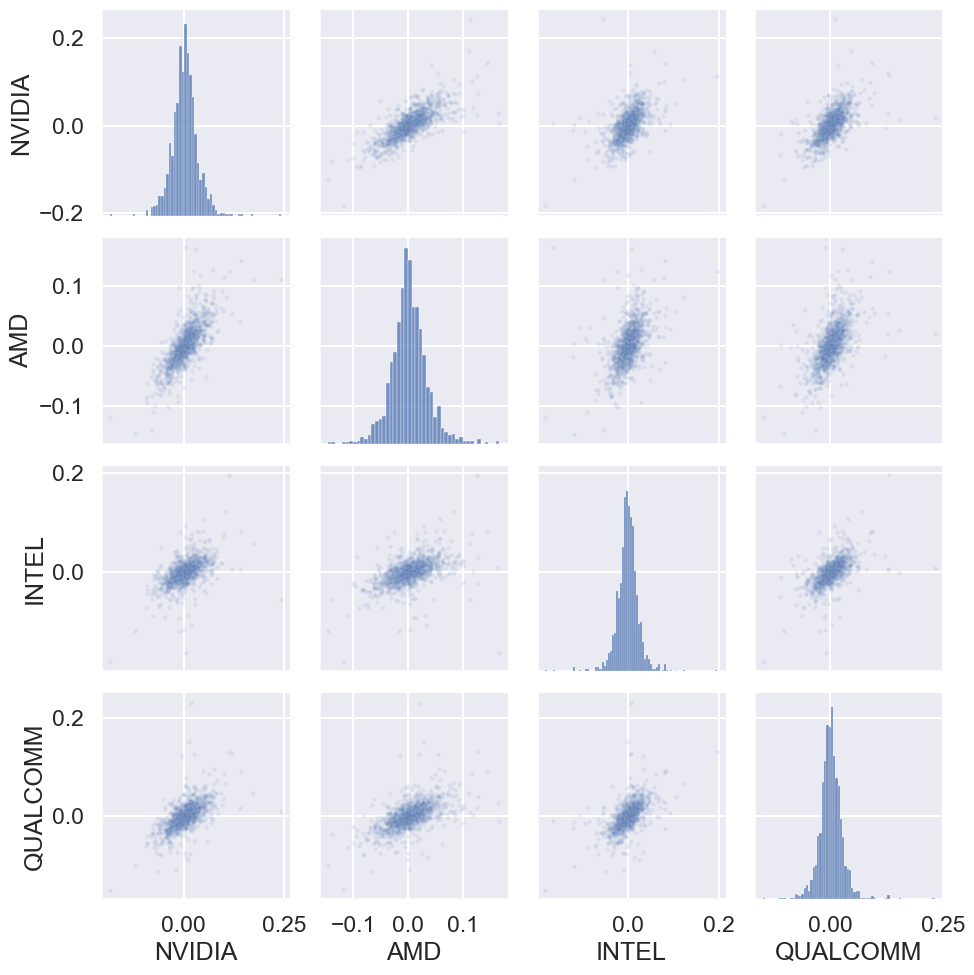

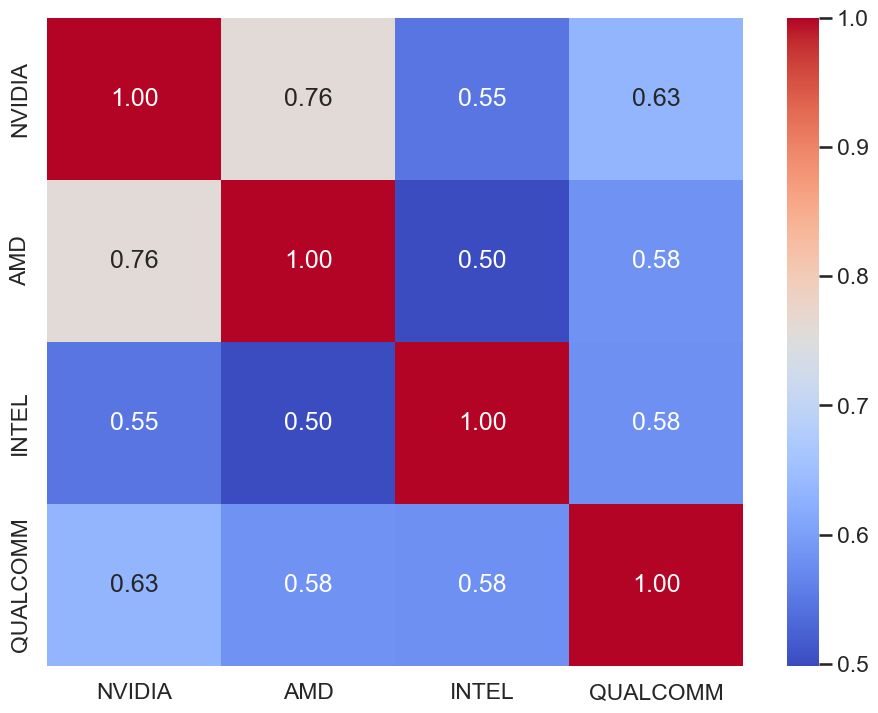

In [83]:
# Select only the 'Adj Close' column for each stock
adj_closes = pd.DataFrame({c_name: c_data['Adj Close'] for c_data, c_name in zip(data_list, c_names)})

# Correlation as PairPlot
tech_rets = adj_closes.pct_change()
sns.set(rc={'figure.figsize':(12,12)})
sns.set_context('talk')
sns.pairplot(tech_rets, kind='scatter', plot_kws={'alpha':0.1, 's':10})
sns.set_palette('deep')
sns.set_style('whitegrid', {'axes.grid' : True})

plt.show()

# Correlation as Heatmap
corr_matrix = tech_rets.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()